In [1]:
# 머신러닝 
# 객실 사용 여부 관련 데이터
# 1. 데이터 탐색
import pandas as pd
import numpy as np

hotel=pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/hotel_bookings.csv")
#결측 
hotel.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [2]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


In [3]:
hotel.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
count,20000.00000,19995.000000,20000.000000,20000.000000,19642.000000,20000.000000,20000.000000,20000.000000,20000.000000,18937.000000
mean,0.12000,85.978345,0.892550,2.380400,0.038133,0.032900,0.169050,0.269400,1.983950,101.410239
std,0.32497,96.427240,0.952077,1.777345,0.191521,0.455552,1.502426,0.687566,15.927212,49.245097
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,0.00000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.800000
50%,0.00000,51.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000
75%,0.00000,132.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000
max,1.00000,629.000000,13.000000,30.000000,1.000000,26.000000,66.000000,17.000000,379.000000,451.500000


In [4]:
# hotel.groupby(hotel['deposit_type']).mean()['adr']
hotel.groupby('deposit_type').mean()['adr']

deposit_type
No Deposit    101.965190
Non Refund     89.689476
Refundable     67.456154
Name: adr, dtype: float64

In [5]:
# 결측치 존재 여부 
# 결측치가 있는 변수 3개 결측치의 개수는 총 1426
# 종속 변수는 int ,  독립변수는 object, int, float  object는 인코딩 해줄필요 있음
# 종속변수인 deposit_type은  대부분 No   

#1-2 결측치를 탐색하고 대체 방법 및 근거를 제시하시오

# 결측치가 있는 변수는 리드타임, 재이용 고객, adr이다. leadtiem은 1%미만으로 삭제한다. 
# is repeated guest  최빈값 대체 adr은 type별 평균 adr

hotel_nonull=hotel

hotel_nonull.dropna(subset=['lead_time'],axis=0,inplace=True)
#binary  is repeated guest 최빈값으로 
hotel_nonull['is_repeated_guest']= hotel_nonull['is_repeated_guest'].fillna(0)
# adr 은 연속형변수라 평균 대치법을 사용
# 보증금 유형에 따라 adr이 다르기 때문에 
# adr 그룹별 평균을 이요
fill_mean_func=lambda g:g.fillna(g.mean())
hotel_nonull=hotel_nonull.groupby(['deposit_type']).apply(fill_mean_func)


In [6]:
hotel_nonull

is_canceled  lead_time  stays_in_weekend_nights  \
deposit_type                                                          
No Deposit   0                0      105.0                        2   
             1                0      303.0                        2   
             2                0       33.0                        2   
             3                0       48.0                        0   
             4                0      216.0                        4   
...                         ...        ...                      ...   
Refundable   15249            0      169.0                        0   
             15428            0      339.0                        2   
             15661            0      169.0                        1   
             16644            0      169.0                        1   
             16851            0      169.0                        1   

                    stays_in_week_nights  is_repeated_guest  \
deposit_type                                                  
No Deposit   0                         5                0.0   
             1                         2                0.0   
             2                         3                0.0   
             3                         1                0.0   
             4                         7                0.0   
...                                  ...                ...   
Refundable   15249                     3                0.0   
             15428                     5                0.0   
             15661                     3                0.0   
             16644                     3                0.0   
             16851                     3                0.0   

                    previous_cancellations  previous_bookings_not_canceled  \
deposit_type                                                                 
No Deposit   0                           0                               0   
             1                           0                               0   
             2                           0                               0   
             3                           0                               0   
             4                           0                               0   
...                                    ...                             ...   
Refundable   15249                       0                               0   
             15428                       0                               0   
             15661                       0                               0   
             16644                       0                               0   
             16851                       0                               0   

                    booking_changes  days_in_waiting_list         adr  
deposit_type                                                           
No Deposit   0                    1                     0  131.500000  
             1                    0                     0   73.950000  
             2                    0                     0  101.965827  
             3                    1                     0   80.300000  
             4                    2                     0   60.900000  
...                             ...                   ...         ...  
Refundable   15249                1                     0   66.000000  
             15428                1                   150   44.360000  
             15661                2                     0   67.500000  
             16644                1                     0   60.000000  
             16851                0                     0   67.456154  

[19995 rows x 10 columns]

In [7]:
deposit_type=pd.Series([a[0]for a in hotel_nonull.index.tolist()], index=[a[1]for a in hotel_nonull.index.tolist()])
hotel_nonull.index=hotel_nonull.index.droplevel(0)
hotel_nonull['deposit_type']=deposit_type

In [8]:
hotel_nonull.isna().sum()

is_canceled                       0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
deposit_type                      0
dtype: int64

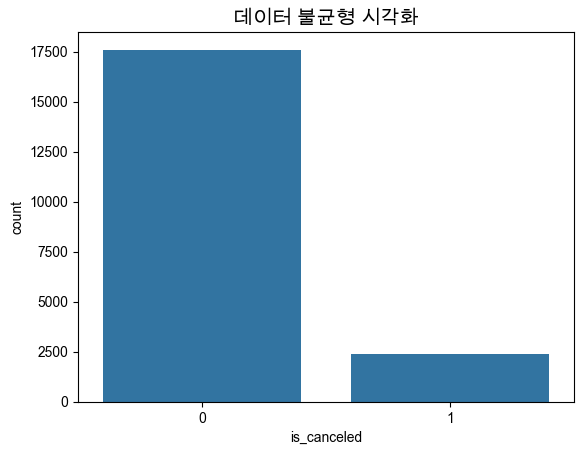

0비율 88.0
1비율 12.0


In [ ]:
#1-4 데이터 불균형을 시각화 하고 식별하고 불균형 판단 근거를 작성하시오
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
font_path='/Library/Fonts/Arial Unicode.ttf'
# font_path = 'C:/Windows/Fonts/malgun.ttf'
# font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'font_path = '/usr/share/fonts/nanum/NanumGothic.ttf'
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)
sns.countplot(x='is_canceled',data=hotel_nonull)
plt.title('데이터 불균형 시각화',fontsize=14)
plt.show()

ratio0=round(len(hotel_nonull[hotel_nonull['is_canceled']==0])/len(hotel_nonull)*100,2)
ratio1=round(len(hotel_nonull[hotel_nonull['is_canceled']==1])/len(hotel_nonull)*100,2)
print('0비율',ratio0)
print('1비율',ratio1)
plt.show()

In [10]:
# 1-5 오버 샘플링 기법을 설명하고 비교한 뒤 2개 법을 선정하고 근거를 제시하시오
# 소수 레이블을 다수 레이블 수만큼 증식시켜 학습에 충분한 데이터를 확보하는 기법이다. 언더 샘플링은 데이터 손실의 문제로
# 예측성능이 저하 되는 단점이 있으므로 일반적으로 불균형한 데이터를 처리하는 방식으로 오버 샘플링을 사용한다.
# 1. 랜덤 오버셈플링 
# 단순 복사하는 방식으로 과적학 발생가능성 있지만 사용방법이 간단하다다는 장점이있다.
# 2. SMOTE 
# k 근접 이웃을 찾아 해당 데이터와 k개 이웃들의 차이를 일정 값으로 만들어 기존데이터와 약간의 차이를 지닌 새로운 데이터를 생성하는 방법
# 느리자만, 과적합 예방
# 1-6 이유 SMOTE와 오버랜덤 샘픟릴 선택 

hotel_nonull=pd.get_dummies(hotel_nonull)
from imblearn.over_sampling import RandomOverSampler,SMOTE
import time

X=hotel_nonull[hotel_nonull.columns.difference(['is_canceled'])]
y=hotel_nonull['is_canceled']

start=time.time()

ros=RandomOverSampler(random_state=42)
X_ro,y_ro=ros.fit_resample(X,y)
print(time.time()-start)

start=time.time()
sm=SMOTE(random_state=42)
X_sm,y_sm=sm.fit_resample(X,y)
print(time.time()-start)

0.018808841705322266
0.014161825180053711


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
X_train,X_test,Y_train,Y_test = train_test_split(X,y,stratify=y,random_state=42,test_size=0.2)
clf=RandomForestClassifier(n_estimators=100,min_samples_split=10)
clf.fit(X_train,Y_train)
print(classification_report(Y_test,clf.predict(X_test)))
X_train,X_test,Y_train,Y_test = train_test_split(X_ro,y_ro,stratify=y_ro,random_state=42,test_size=0.2)
clf=RandomForestClassifier(n_estimators=100,min_samples_split=10)
clf.fit(X_train,Y_train)
print(classification_report(Y_test,clf.predict(X_test)))
X_train,X_test,Y_train,Y_test = train_test_split(X_sm,y_sm,stratify=y_sm,random_state=42,test_size=0.2)
clf=RandomForestClassifier(n_estimators=100,min_samples_split=10)
clf.fit(X_train,Y_train)
print(classification_report(Y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3519
           1       0.97      0.36      0.53       480

    accuracy                           0.92      3999
   macro avg       0.94      0.68      0.74      3999
weighted avg       0.93      0.92      0.91      3999

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      3519
           1       0.93      0.98      0.95      3519

    accuracy                           0.95      7038
   macro avg       0.95      0.95      0.95      7038
weighted avg       0.95      0.95      0.95      7038

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3519
           1       0.89      0.88      0.89      3519

    accuracy                           0.89      7038
   macro avg       0.89      0.89      0.89      7038
weighted avg       0.89      0.89      0.89      7038



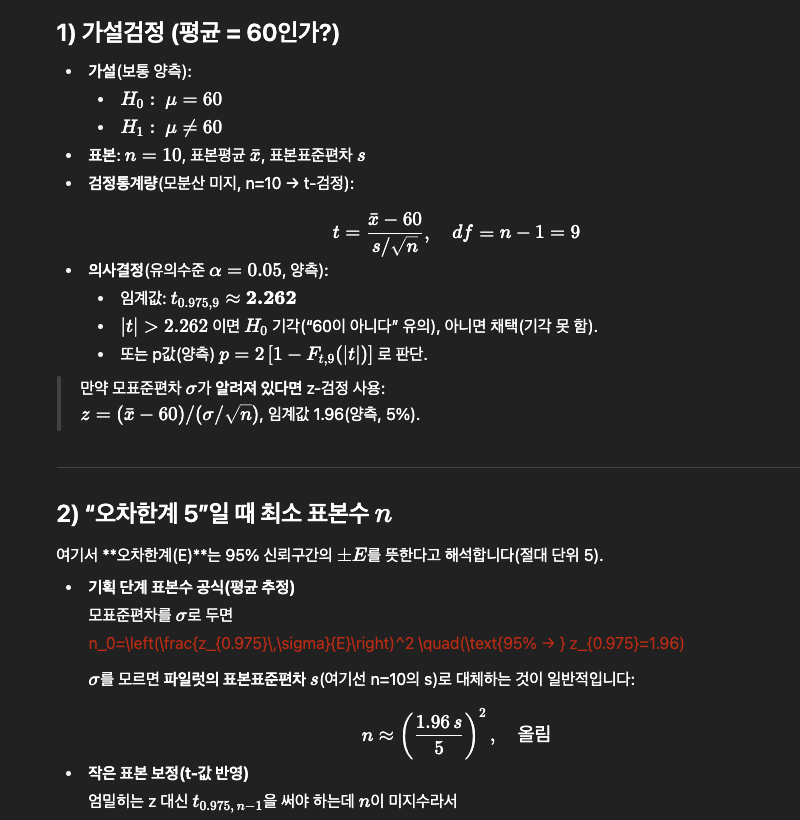

In [ ]:
#통계분석 
# 공장에서는 시제품의 농도가 60% 라고 주장하며 품질 관리팀에서 10개의 샘플을 뽑았다. 유의 수준 5% 안에 검증하시오
# 1-1 연구가설, 귀무가설작성하시요
# 1-2 유효한 샘플 수를 계산하시오
# 1-3 검정통계량을 구하고 ㅏ연구가설 채택 여부를 계산하시오
import scipy.stats as stats
data=[52,61,61,60,26,45,60,35,60,14]
print(stats.shapiro(data))# 비모수
# 1-1 H0 : 60이다.
# H1: 60이 아니다.
# 윌콕슨 써야겠다 생각. 
import numpy as np
std=np.std(data)
# 정규 분포
print((stats.t.ppf(q=0.025,df=9)*std/5)**2)# 오차 한계 5 신뢰수준 0.05 를 넣고 z 인데 양측검정이므로 변경하였음.
print(stats.wilcoxon(np.array(data)-60))# 기각 이므로 60이 아니다.

ShapiroResult(statistic=0.8137151002883911, pvalue=0.02126994915306568)
53.22868006902618
WilcoxonResult(statistic=3.0, pvalue=0.0625089161964483)


/opt/homebrew/Caskroom/miniforge/base/envs/general/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/homebrew/Caskroom/miniforge/base/envs/general/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [27]:
#통계2 
import pandas as pd
from urllib.parse import urlsplit, urlunsplit, quote, parse_qsl, urlencode

from urllib.parse import urlparse, urlunparse, quote, parse_qsl, urlencode

def url_to_ascii(url: str) -> str:
    """
    한글/공백 등 비ASCII 문자가 들어간 URL을
    - 호스트: IDNA(punycode)
    - path/params/query/fragment: UTF-8 percent-encoding
    으로 변환 (ASCII only).
    """
    s = urlparse(url)  # <-- urlsplit 대신 urlparse

    # 1) 호스트를 IDNA(punycode)로
    host = s.hostname or ""
    try:
        host_ascii = host.encode("idna").decode("ascii") if host else ""
    except Exception:
        host_ascii = host

    # userinfo와 port 복원
    userinfo = ""
    if s.username is not None:
        userinfo = quote(s.username, safe="-._~")
        if s.password is not None:
            userinfo += ":" + quote(s.password, safe="-._~")
        userinfo += "@"
    port = f":{s.port}" if s.port else ""
    netloc = f"{userinfo}{host_ascii}{port}"

    # 2) 경로/파라미터/쿼리/프래그먼트 인코딩
    path = quote(s.path, safe="/-._~%")
    params = quote(s.params, safe=";=-._~%")
    # 쿼리는 key=value 단위로 재인코딩 (공백을 %20로 유지)
    query_pairs = parse_qsl(s.query, keep_blank_values=True)
    query = urlencode(query_pairs, doseq=True, safe="-._~", encoding="utf-8", quote_via=quote)
    fragment = quote(s.fragment, safe="-._~%")

    return urlunparse((s.scheme, netloc, path, params, query, fragment))

# url=url_to_ascii("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/서울특별시 코로나19.csv")
# covid=pd.read_csv(url)
covid=pd.read_excel("/Users/dongunyun/github.com/PREP_ADP/서울시_자치구별_코로나 확진자, 사망자 현황(일자별).xlsx")

In [28]:
from urllib.parse import urlparse, urlunparse, quote, unquote, parse_qsl, urlencode

def url_to_ascii(url: str) -> str:
    """사람이 읽기 좋은(한글 포함) URL → RFC3986 ASCII URL"""
    s = urlparse(url)
    host = s.hostname or ""
    try:
        host_ascii = host.encode("idna").decode("ascii") if host else ""
    except Exception:
        host_ascii = host
    userinfo = ""
    if s.username is not None:
        userinfo = quote(s.username, safe="-._~")
        if s.password is not None:
            userinfo += ":" + quote(s.password, safe="-._~")
        userinfo += "@"
    port = f":{s.port}" if s.port else ""
    netloc = f"{userinfo}{host_ascii}{port}"

    path = quote(s.path, safe="/-._~%")
    params = quote(s.params, safe=";=-._~%")
    q_pairs = parse_qsl(s.query, keep_blank_values=True)
    # 공백은 %20로 통일 (quote_via=quote)
    query = urlencode(q_pairs, doseq=True, safe="-._~", encoding="utf-8", quote_via=quote)
    fragment = quote(s.fragment, safe="-._~%")
    return urlunparse((s.scheme, netloc, path, params, query, fragment))


def url_to_unicode(url: str) -> str:
    """RFC3986 ASCII URL(퍼센트/푸니코드) → 사람이 읽기 좋은 한글 URL"""
    s = urlparse(url)
    # 호스트: punycode → 유니코드
    host = s.hostname or ""
    try:
        host_uni = host.encode("ascii").decode("idna") if host else ""
    except Exception:
        host_uni = host
    # userinfo 복원
    username = unquote(s.username) if s.username else None
    password = unquote(s.password) if s.password else None
    userinfo = ""
    if username is not None:
        userinfo = username + (f":{password}" if password is not None else "") + "@"
    port = f":{s.port}" if s.port else ""
    netloc = f"{userinfo}{host_uni}{port}"

    path = unquote(s.path, encoding="utf-8")
    params = unquote(s.params, encoding="utf-8")
    # 쿼리는 안전하게 파싱해서 key=value 문자열로 복원(사람이 읽기 좋게)
    q_pairs = parse_qsl(s.query, keep_blank_values=True, encoding="utf-8")
    query = "&".join([f"{k}={v}" if v != "" else f"{k}=" for k, v in q_pairs])
    fragment = unquote(s.fragment, encoding="utf-8")
    return urlunparse((s.scheme, netloc, path, params, query, fragment))


def is_well_encoded(ascii_url: str) -> bool:
    """
    '잘 인코딩됐는지' 체크: ASCII URL을 디코드→다시 인코드 했을 때
    정규화된 ASCII가 동일한지 비교.
    """
    try:
        return url_to_ascii(url_to_unicode(ascii_url)) == url_to_ascii(ascii_url)
    except Exception:
        return False

url_to_unicode(url)


'https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/서울특별시 코로나19.csv'

In [29]:
covid_new=[]
column_name=[a for a in covid.columns]# if 'Unnamed' not in a]
for idx,row in covid.iterrows():
    if idx==0:
        continue
    if idx==len(covid)-1:
        continue
    row_new={}
    row_new[column_name[0]]=row.iloc[0]
    for i in range(1,len(row),2):
        row_new[column_name[i]]=row.iloc[i]+row.iloc[i+1]
    covid_new.append(row_new)


In [30]:
covid_new=pd.DataFrame(covid_new)
print(covid_new.shape)

(1284, 29)


In [31]:
covid1=covid_new[covid_new.columns.difference(['구분','기타','타시도','총합계'])]
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess

def acf(x,n_lags):
    return sm.tsa.stattools.acf(x,nlags=n_lags)

n_lags=1284
lag_arr=np.repeat(n_lags,covid1.shape[1])
acf_list=list(map(acf,covid1.transpose().to_numpy(),lag_arr))
acf_df=pd.DataFrame(acf_list).transpose()
acf_df.columns=covid1.columns

acf_df=acf_df.T

Text(0.5, 1.0, 'acf')

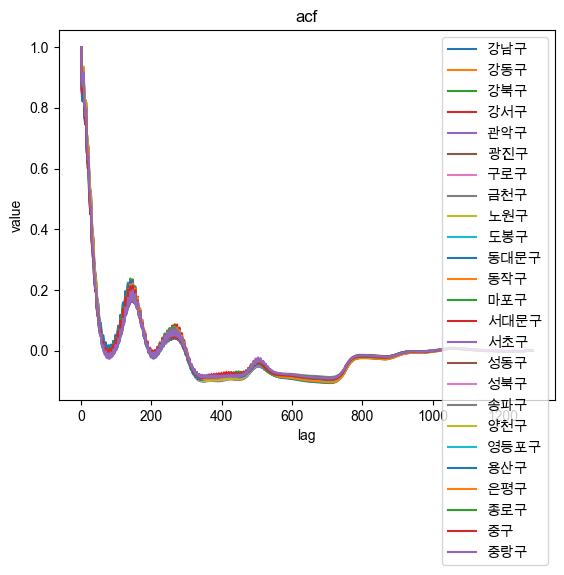

In [41]:
acf_df.T.plot()
plt.xlabel('lag')
plt.ylabel('value')
plt.title('acf')

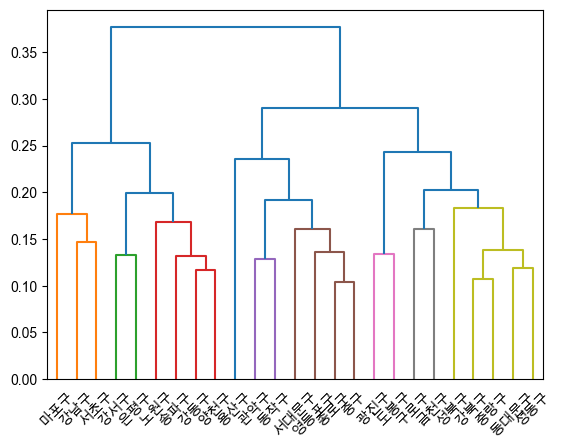

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path='/Library/Fonts/Arial Unicode.ttf'
font= font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)
plt.figure()
label=acf_df.index
dend1=sch.linkage(acf_df,method='average')
cutoff=0.5*max(dend1[:,2])#거리임
dend_res1=sch.dendrogram(dend1,color_threshold=cutoff,labels=label)
plt.show()

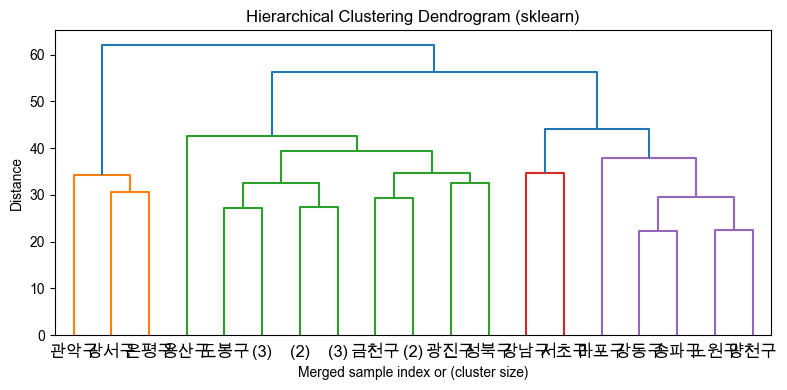

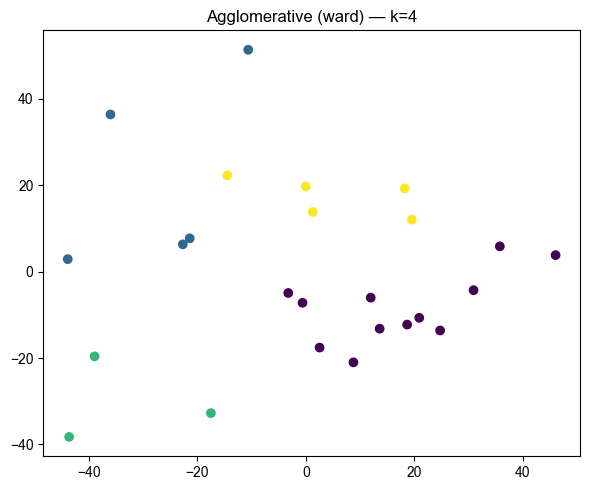

In [45]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram


# --- sklearn 모델에서 덴드로그램을 그리기 위한 헬퍼 ---
def plot_dendrogram(model, **kwargs):
    """
    sklearn AgglomerativeClustering 모델의 children_/distances_로
    SciPy dendrogram을 그립니다.
    """
    # 각 merge에 포함된 샘플 수 계산
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        cnt = 0
        for child_idx in merge:
            if child_idx < n_samples:  # leaf node
                cnt += 1
            else:
                cnt += counts[child_idx - n_samples]
        counts[i] = cnt

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)


# --- 예시 데이터 ---
# X, y_true = make_blobs(n_samples=200, centers=4, cluster_std=1.1, random_state=7)
X = StandardScaler().fit_transform(acf_df)

# --- 전체 트리 학습 (덴드로그램 용) ---
# distances_를 얻기 위해 distance_threshold=0, n_clusters=None로 설정
try:
    model_full = AgglomerativeClustering(
        linkage="average",
        distance_threshold=0.0,
        n_clusters=None,
        compute_distances=True,  # 구버전 sklearn이면 TypeError → except 분기로 처리
    )
except TypeError:
    model_full = AgglomerativeClustering(
        linkage="ward",
        distance_threshold=0.0,
        n_clusters=None,
    )

model_full.fit(X)

# --- 덴드로그램 ---
plt.figure(figsize=(8, 4))
plt.title("Hierarchical Clustering Dendrogram (sklearn)")
plot_dendrogram(model_full, truncate_mode="level", p=5,labels=acf_df.index)  # 깊이 제한(옵션)
plt.xlabel("Merged sample index or (cluster size)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

# --- 원하는 클러스터 개수로 자르기 ---
k = 4
model_k = AgglomerativeClustering(linkage="ward", n_clusters=k)
labels = model_k.fit_predict(X)
from sklearn.decomposition import PCA
# --- 산점도 시각화 ---
pca=PCA()
PCA_X=pca.fit_transform(X)
plt.figure(figsize=(6, 5))
plt.scatter(PCA_X[:, 0], PCA_X[:, 1], c=labels)
plt.title(f"Agglomerative (ward) — k={k}")
plt.tight_layout()
plt.show()


In [34]:
#3 사회과학 , 자연과학 공학 세개 학과의 평점 조사표를 보고 학과와 성적이 관계있는지 검정하시오
사회=[16,30,12]
자연=[12,20,3]
공학=[18,13,14]
table=pd.DataFrame({'자연과학':사회,'자연과학':자연,'공학':공학},index=['3.5','2.5','1.5'])

In [35]:
# H0 성적과 학과 간에는 관련성이 없다.
# H1 성적과 학과 간에는 관련성이 있다.
# 독립성 검정 수행 카이제곱 
from scipy import stats
stats.chi2_contingency(observed=table)  #관련성이있다.

Chi2ContingencyResult(statistic=8.688249441190617, pvalue=0.012982866912062253, dof=2, expected_freq=array([[13.125 , 16.875 ],
       [14.4375, 18.5625],
       [ 7.4375,  9.5625]]))